# Homework 1: Wasil Engel 

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import bokeh
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from ipywidgets import interact, interact_manual

In [2]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [3]:
# ch. 2, no. 10

In [4]:
# a 
# To begin, load in the Boston data set. 

In [5]:
path = '/Users/wasilengel/Desktop/School/Harris/Machine Learning/Boston/Boston.csv'

In [6]:
df = pd.read_csv(path)

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
# How many rows are in this data set? 506 (505 observations, excluding headline with variable names)

In [9]:
# How many columns? 14 (index automatically excluded)

In [10]:
# What do the rows and columns represent? It shows Boston housing data and as such lists the various factors affecting the quality of housing per town/ suburb. 

In [11]:
# b
# Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

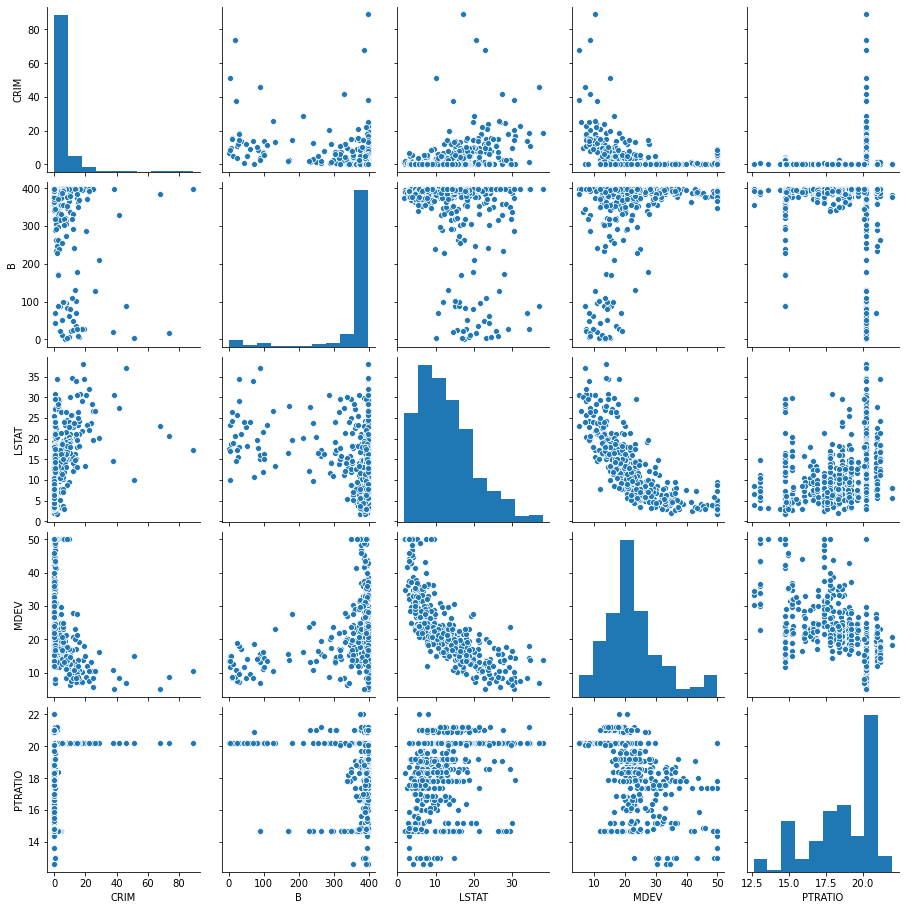

In [12]:
sns.pairplot(df, vars = ["CRIM", "B", "LSTAT", "MDEV", "PTRATIO"])

In [13]:
# Based on the predictors that I chose, the pairwise scatterplot yields some interesting results. For example, there is a strong negative correlation between the percentage of the lower status of the population and the median value of owner-occupied home. That means that the larger the percentage share of the lower population status is, the lower is the median value of the homes in these areas (that's pretty intuitive). Furthermore, there is a positive trend between the percentage of lower status of the population and the pupil-teacher ratio, which is sad but true: the poorer a suburb is, the higher the pupil-teacher ratio is. In a similar vein, a (slight) positive trend can also be observed with regards to the crime rate: the poorer the suburb, the higher the crime rate is. This observations will lead me to answering the next question.    

In [14]:
# c
# Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

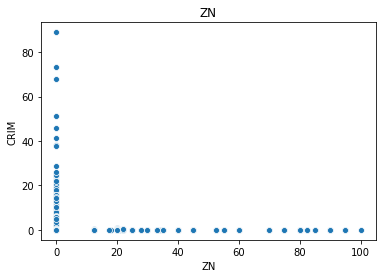

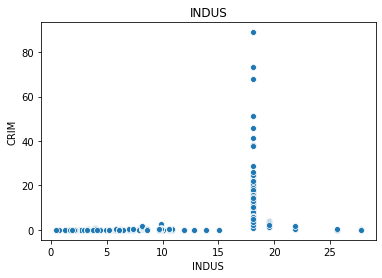

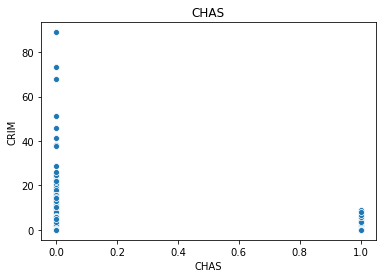

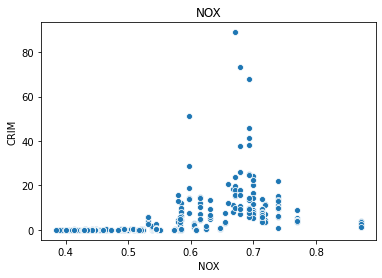

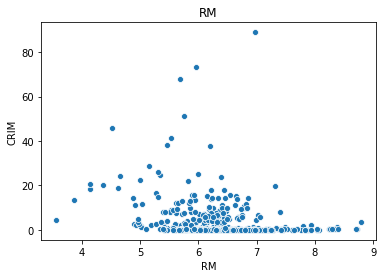

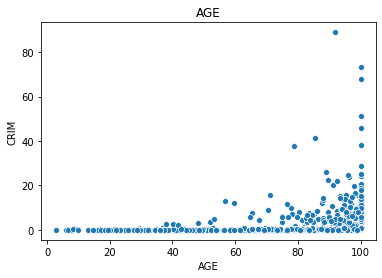

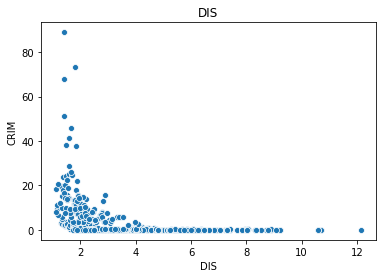

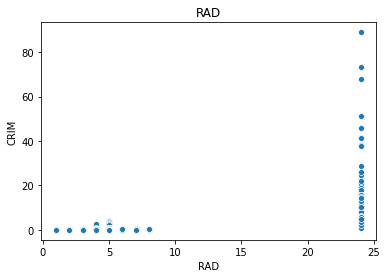

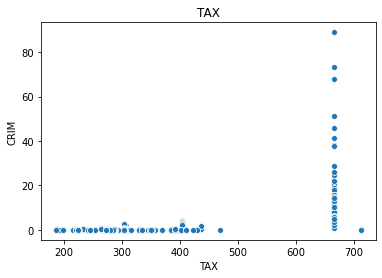

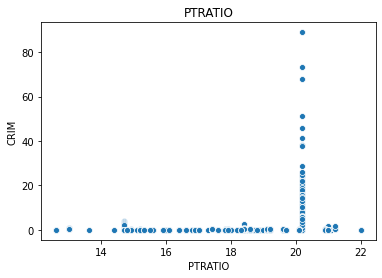

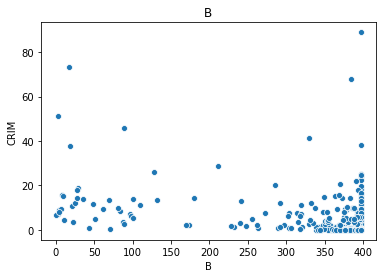

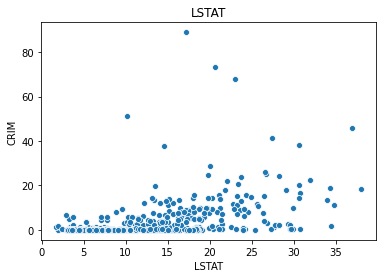

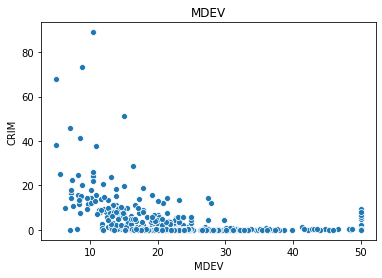

In [15]:
for col in df.iloc[:,1:14].columns: 
    sns.scatterplot(df[col],df['CRIM'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('CRIM')
    plt.show()

In [16]:
# Plotting crime against the other variables, I can observe that the crime rate is associstated with (to name a few):
# NOX, nitric oxides concentration (parts per 10 million): higher crime rates where nitric oxides concentrates around 60-70%
# RM, average number of rooms per dwelling: higher crime rates where the average number of rooms per dwelling is lower
# AGE, proportion of owner-occupied units built prior to 1940: higher crimes rates where there are older homes (interesting!)
# DIS, weighted distances to five Boston employment centres: higher crime rates where the distance to employment centres is closer
# MDEV, Median value of owner-occupied homes in $1000's: higher crime rates where the median value of homes is lower 

In [17]:
# d
# Do any of the suburbs of Boston appear to have particularly high crime rates? 
# Yes, suburbs 380 (89%), 418 (74%), and 405 (68%) are the three suburbs with the highest crime rates. 

In [18]:
df.sort_values(by=['CRIM'], ascending=False).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


In [19]:
# Tax rates: 
tax_list = df["TAX"]
tax_list.min()
tax_list.max()
# With a full-value property-tax rate per $10,000 of $666, these suburbs are particularly highly taxed (max tax value at $711, min tax value at $187).

711.0

In [20]:
# Pupil-teacher ratios? 
ptratio_list = df["PTRATIO"]
ptratio_list.min()
ptratio_list.max()
# With a pupil-teacher ratio by suburb at 20.2, these pupil-teacher ratio is particularly high (max ratio at 22, min ratio at 12.6).

22.0

In [21]:
# e
# How many of the suburbs in this data set bound the Charles river? 
# Note that it's a dummy variable = 1 if tract bounds river, 0 otherwise

In [22]:
len(df.loc[df['CHAS'] == 1.0])

35

In [23]:
# The answer is 35 suburbs.

In [24]:
# f 
# What is the median pupil-teacher ratio among the towns in this data set?

In [25]:
df["PTRATIO"].median()

19.05

In [26]:
# The median pupil-teacher ratio among the towns/ suburbs is 19.05.

In [27]:
# g 
# Which suburb of Boston has lowest median value of owneroccupied homes? 

In [28]:
df.sort_values(by=['MDEV']).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
400,25.0461,0.0,18.1,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6


In [29]:
# The two suburbs 398 and 405 have the lowest median value of owneroccupied homes.

In [30]:
# What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.
# Compared to the two ranges that I had already identified above, PTRATIO between 12.6 and 22, and TAX between $187 and $711, I can see that these two suburbs are also particularly high taxed and are characterized by a very high pupil-teacher ratio too. With regards to other predictors, for example LSTAT and AGE (see ranges below), I see that the proportion of owner-occupied units built prior to 1940 is at the max end in both cases (that means all houses are old: 100%) and the percentage of the lower status of the population is also relatively high, 30.59% and 22.98%, respectively.  

In [31]:
df["LSTAT"].max() # 1.73
df["LSTAT"].max() # 37.97
df["AGE"].min() # 2.9
df["AGE"].max() # 100

100.0

In [32]:
# h
# In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?

In [33]:
len(df.loc[df['RM'] > 7])

64

In [34]:
# 64 suburbs have more than seven rooms per dwelling.

In [35]:
len(df.loc[df['RM'] > 8])

13

In [36]:
# 13 suburbs have more than eight rooms per dwelling.

In [37]:
# Comment on the suburbs that average more than eight rooms per dwelling.

In [38]:
eightplus = df.loc[df['RM'] > 8]
eightplus

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0.0,0.5040,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0.0,0.5070,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0.0,0.5070,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0


In [39]:
# Given the knowledge about the range values I obtained in the previous taxes, I can see that dwellings with 8 or more rooms:
# - are higher than average in terms of AGE, the proportion of owner-occupied units built prior to 1940 -- range in df between 2.9% and 100% with a mean of 68.6%, here: 71.5%
df["AGE"].mean() # 68.57490118577078
eightplus["AGE"].mean() # 71.53846153846153
# - are lower than average in terms of LSTAT, the percentage of the lower status of the population -- range between 1.73% and 37.97% with a mean of 12.7%, here: 4.3%
df["LSTAT"].mean() # 12.653063241106723
eightplus["LSTAT"].mean() # 4.31
# - are lower than average in terms of PTRATIO, the pupil-teacher ratio by town -- range between 12.6 and 22 with a mean of 18.5, here: 16.4
df["PTRATIO"].mean() # 18.455533596837967
eightplus["PTRATIO"].mean() # 16.361538461538462
# - are lower than average in terms of TAX, the full-value property-tax rate per $10,000 -- range between $187 and $711 with a mean of $408.2, here: $325.1
df["TAX"].mean() # 408.2371541501976
eightplus["TAX"].mean() # 325.0769230769231
# Overall, these dwellings seem to be located in one of the better Boston suburbs!

325.0769230769231

In [40]:
# ch. 3, no. 15
# We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [41]:
# a
# For each predictor, fit a simple linear regression model to predict the response. 

In [42]:
import statsmodels.formula.api as smf

In [43]:
for col in df.iloc[:,1:14].columns: 
        result = smf.ols('CRIM ~ df[col]', data = df).fit()
        print("The next predictor is")
        print(col)
        print(result.summary())
        print('' + '\n' + '\n' + '\n')

The next predictor is
ZN
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     20.88
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           6.15e-06
Time:                        23:22:05   Log-Likelihood:                -1795.8
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4292      

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     318.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.62e-55
Time:                        23:22:05   Log-Likelihood:                -1682.3
No. Observations:                 506   AIC:                             3369.
Df Residuals:                     504   BIC:                             3377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2709      0.445     -5.105      0.0

In [44]:
list = [0.1071, -0.0355, -1.8715, -1.5428, 0.5068, 0.5444, -0.3606, 30.9753, 1.1446, 0.6141, -2.6910, 0.0296, 4.4292]

Text(0.5, 1.0, 'CRIM vs CHAS')

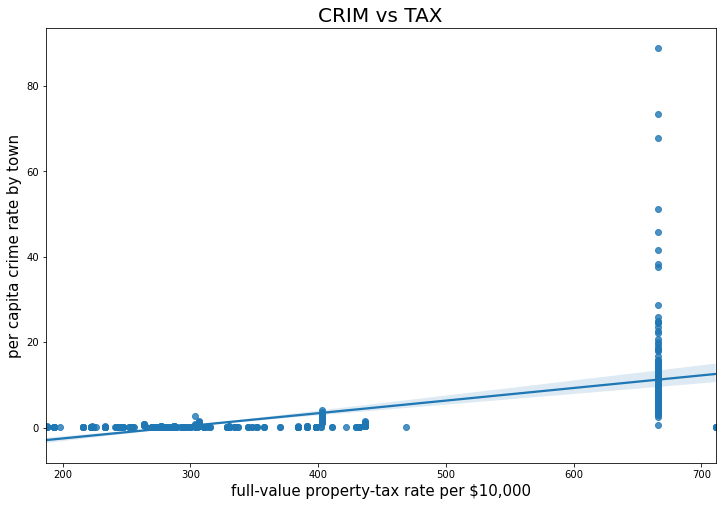

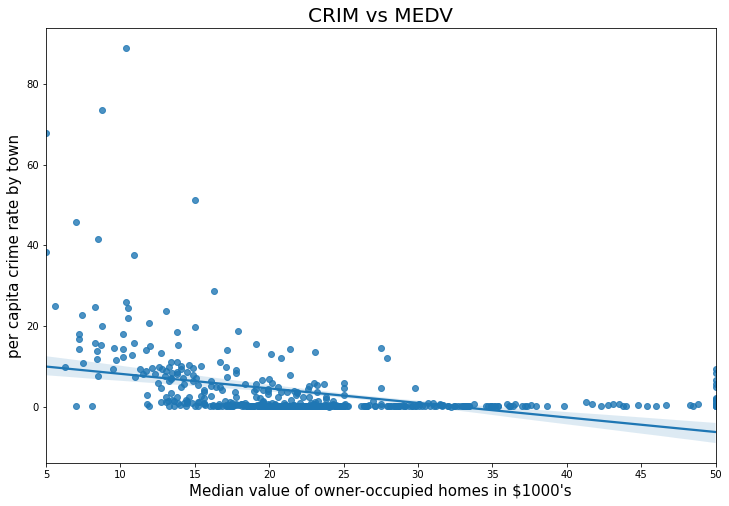

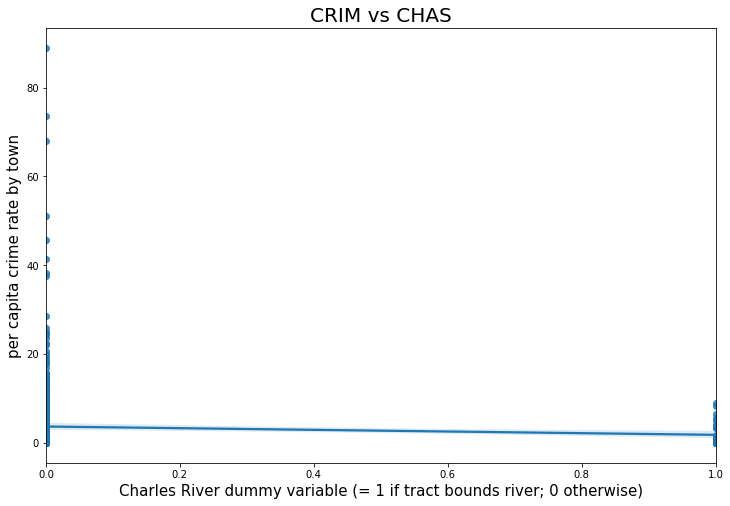

In [45]:
# Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.
# There is a statistically significant association at alpha = 0.05 between crime (dependent variable) and all the predictors except CHAS (which is binary).
# Please note that I already created an extensive series of plots above in ch. 2, no. 10.
# However, to back my findings, I will now map the following two plots using regplot this time, two showing statistically significant relationships, e.g. TAX and MDEV, and one that is non-significant for the data I was given, here CHAS.

# A 1%-increase in full-value property-tax is associated with a 2.96% increase in crime rate per town. 
plt.figure(figsize=(12,8))
sns.regplot(x="TAX", y="CRIM", data=df)
plt.xlabel("full-value property-tax rate per $10,000", fontsize=15)
plt.ylabel("per capita crime rate by town", fontsize=15)
plt.title('CRIM vs TAX', fontsize=20)

# A one-unit increase in the median value of owner-occupied homes, here in $1000, is associated with a decrease in crime by 36%.
plt.figure(figsize=(12,8))
sns.regplot(x="MDEV", y="CRIM", data=df)
plt.xlabel("Median value of owner-occupied homes in $1000's", fontsize=15)
plt.ylabel("per capita crime rate by town", fontsize=15)
plt.title('CRIM vs MEDV', fontsize=20)

# The straight line implies that the relationship between the two variables is not statistically meaningful.
plt.figure(figsize=(12,8))
sns.regplot(x="CHAS", y="CRIM", data=df)
plt.xlabel("Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)", fontsize=15)
plt.ylabel("per capita crime rate by town", fontsize=15)
plt.title('CRIM vs CHAS', fontsize=20)


In [46]:
# b 
# Fit a multiple regression model to predict the response using all of the predictors. 

In [47]:
predictors = ' + '.join(df.columns.difference([14,'CRIM']))
results = smf.ols('CRIM ~ {}'.format(predictors),data = df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.08e-19
Time:                        23:22:07   Log-Likelihood:                -1765.3
No. Observations:                 506   AIC:                             3535.
Df Residuals:                     504   BIC:                             3543.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7202      0.935     12.539      0.0

In [48]:
# Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?
# Here, we can reject the null at alpha = 0.05 for ZN, RAD, NOX (note how it's at the margin yet t>2 and p<5.0), MDEV, and DIS. For all other predictors, we cannot reject the null, hence, we cannot conclude a statistically significant relationship. Given that the null for an F-test (which is what we are performining here, it's our default for multivariate regression analysis) is much more pessimistic by design (we assume that no regressor affects our dependent variable, CRIM), it doesn't surprise me that less predictors are now statistically significant compared with a. To describe the results, I can say that, e.g. 
# - A 1%-increase in full-value property-tax is associated with a -0.37% decrease in crime rate per town, holding all other factors constant. This is interesting because the relationship is suddenly reverse (unlike a). However, given that our R-squared is so much higher now - it's at 44.8% and before, in a, for TAX, it was only at 33.6% - this model explains more variation but is it the preferred choice? Perhaps, but I keep in mind that R-square does never increase and either stays constant or increases as we add more predictors. That's why I look at the adjusted R-squared, which is much higher here too, it's at 43.4%, so, I'd conclude that the tax relationship is indeed negative.
# - A one-unit increase in the median value of owner-occupied homes, here in $1000, is associated with a decrease in crime by 19.92%. Similarly to how I argued above with regards to the R-squared value, the multivariate model explains more variation, hence, I'd pay heed to the approx. 20% decrease here. However, unlike before, at least the direction of the relationship, here negative, remains the same. 

In [49]:
# c 
# How do your results from (a) compare to your results from (b)? For a comparison regarding the null and the R-squared value, see above in b. 

# Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [50]:
result.params # multivariate 

Intercept    11.720157
df[col]      -0.360647
dtype: float64

In [51]:
multi = results.params[1:14] # removing the intercept -> 13 variables
uni = list # 13 variables, see above in a 
multi_df = multi.to_frame().reset_index()
uni_dictionary = {"uni":[0.1071,
 -0.0355,
 -1.8715,
 -1.5428,
 0.5068,
 0.5444,
 -0.3606,
 30.9753,
 1.1446,
 0.6141,
 -2.691,
 0.0296,
 4.4292]}
uni_df = pd.DataFrame(data = uni_dictionary)
joined_df = multi_df.join(uni_df)
joined_df.columns = ["index", "multi", "uni"]
joined_df

,index,multi,uni
0,AGE,0.002011,0.1071
1,B,-0.006855,-0.0355
2,CHAS,-0.741435,-1.8715
3,DIS,-0.994992,-1.5428
4,INDUS,-0.061576,0.5068
5,LSTAT,0.121269,0.5444
6,MDEV,-0.199218,-0.3606
7,NOX,-10.645500,30.9753
8,PTRATIO,-0.278731,1.1446
9,RAD,0.588838,0.6141


Text(0.5, 1.0, 'Comparison univariate v. multivariate regression coefficients')

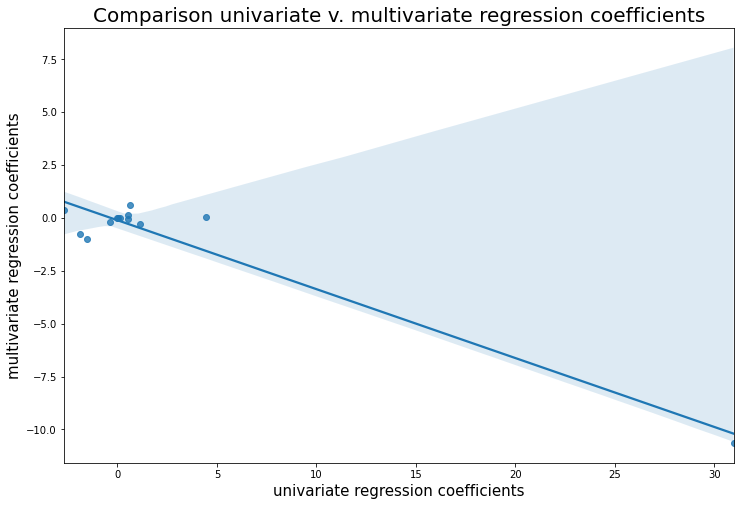

In [52]:
plt.figure(figsize=(12,8))
sns.regplot(x="uni", y="multi", data=joined_df)
plt.xlabel("univariate regression coefficients", fontsize=15)
plt.ylabel("multivariate regression coefficients", fontsize=15)
plt.title('Comparison univariate v. multivariate regression coefficients', fontsize=20)

In [53]:
# d 
# Is there evidence of non-linear association between any of the predictors and the response? To answer this question,
# for each predictor X, fit a model of the form Y = β0 + β1X + β2X^2 + β3X^3 + E.

In [54]:
predictorss = ' + '.join(df.columns.difference([14,'CRIM']))
result = smf.ols(formula = 'CRIM ~ {} + MDEV + np.power(MDEV, 2) + np.power(MDEV, 3)'.format(predictorss),data = df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     39.39
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.67e-74
Time:                        23:22:07   Log-Likelihood:                -1605.9
No. Observations:                 506   AIC:                             3244.
Df Residuals:                     490   BIC:                             3311.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            67.4513      8.20

In [55]:
# Yes, from what I can see, based on the regression table, the following predictors suggest that there is evidence of a non-linear association between CRIM and:
# - DIS, ceteris paribus
# - LSTAT, ceteris paribus
# - MDEV, ceteris paribus
# - NOX, ceteris paribus
# - RAD, ceteris paribus
# - RM, ceteris paribus
# - the interaction terms, np.power(MDEV, 2) and np.power(MDEV, 3)